

>  ## ***` Task 2: Decision Trees for Classification`*** ##

---
```Description:```

`Build a decision tree classifier to predict a categorical outcome (e.g., predict species of flowers).`

---
```Objectives:```

```
1. Train a decision tree on a labeled dataset (e.g., the Iris dataset).
2. Visualize the tree structure.
3. Prune the tree to prevent overfitting.
4. Evaluate the model using classification metrics such as
   accuracy and F1-score.
```

---

`Tools: Python, scikit-learn, pandas.`

`Using Iris dataset.`

### ***1- Import pre-processing libs*** ###

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


### ***2- Import and Load Data*** ###

In [3]:
df = pd.read_csv(r'D:\Abdelraouf\Quran\Codveda-ML-Internship\DataSet-For-Tasks\1_iris.csv')

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### ***3- Exploring Data*** ###

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [8]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [9]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 3


In [10]:
df.shape

(150, 5)

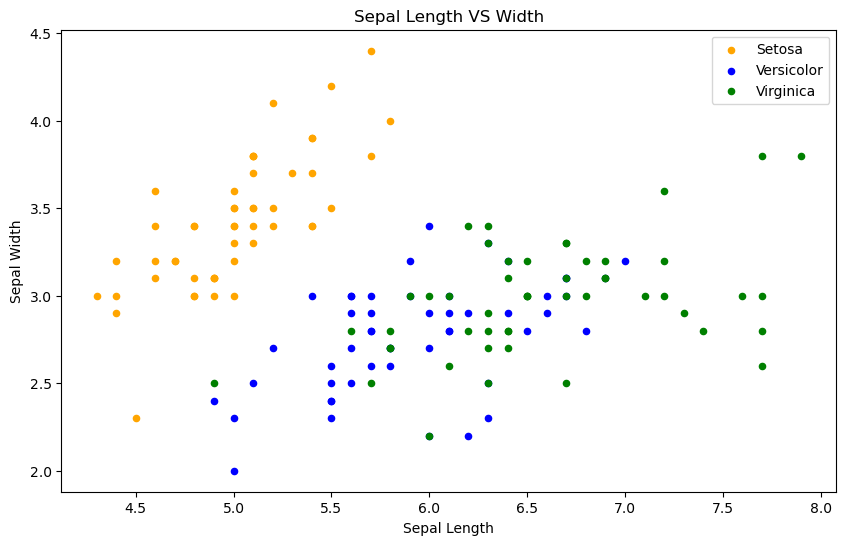

In [11]:
fig = df[df.species=='setosa'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='orange', label='Setosa')
df[df.species=='versicolor'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='blue', label='Versicolor', ax=fig)
df[df.species=='virginica'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='green', label='Virginica', ax=fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

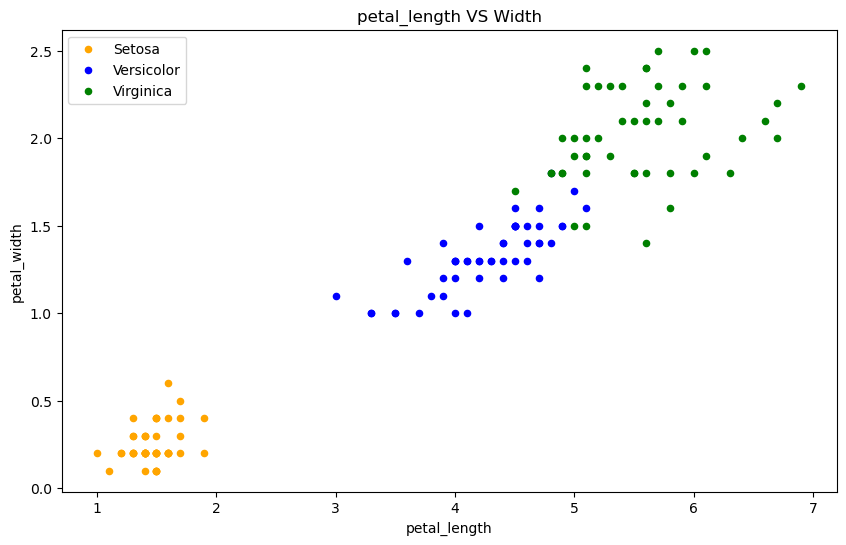

In [12]:
fig = df[df.species=='setosa'].plot(kind='scatter', x='petal_length', y='petal_width', color='orange', label='Setosa')
df[df.species=='versicolor'].plot(kind='scatter', x='petal_length', y='petal_width', color='blue', label='Versicolor', ax=fig)
df[df.species=='virginica'].plot(kind='scatter', x='petal_length', y='petal_width', color='green', label='Virginica', ax=fig)

fig.set_xlabel("petal_length")
fig.set_ylabel("petal_width")
fig.set_title("petal_length VS Width")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

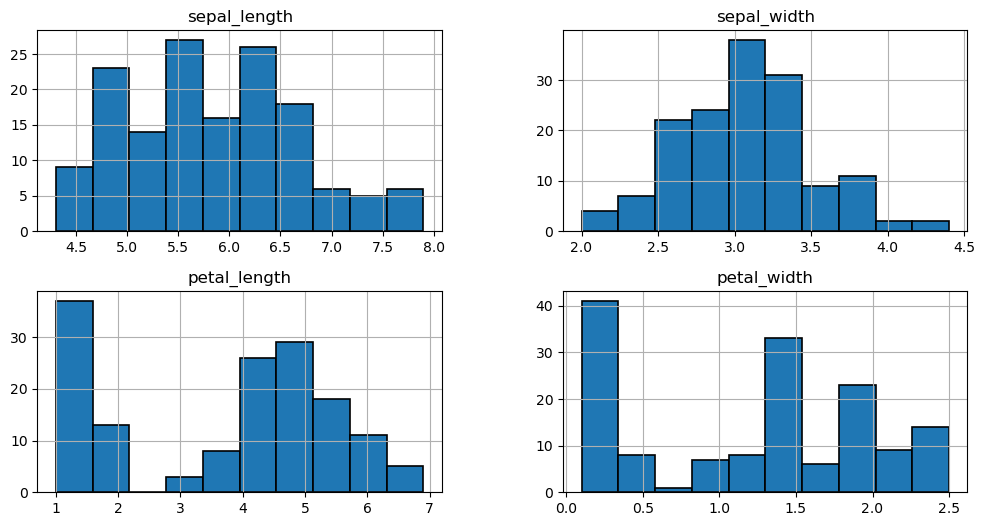

In [13]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

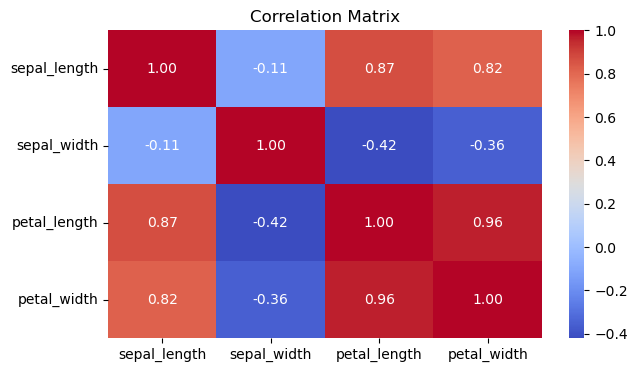

In [14]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

### ***4- Data Preprocessing*** ###

In [15]:
df = df.drop_duplicates() # Remove duplicate rows

In [16]:
df.duplicated().sum()

0

In [17]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [18]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### ***5_ Data Encoding*** ###

In [19]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # Encode species column

In [20]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int32
dtype: object

### ***6_ Scaling Data*** ###

In [21]:
sc = StandardScaler()
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = sc.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.915509,1.019971,-1.357737,-1.3357,0
1,-1.157560,-0.128082,-1.357737,-1.3357,0
2,-1.399610,0.331139,-1.414778,-1.3357,0
3,-1.520635,0.101529,-1.300696,-1.3357,0
4,-1.036535,1.249582,-1.357737,-1.3357,0


### ***7_ Feature & Target Selection*** ###

In [23]:
X = df.drop('species', axis=1)  # Features
y = df['species']  # Target variable

In [24]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,-0.915509,1.019971,-1.357737,-1.335700
1,-1.157560,-0.128082,-1.357737,-1.335700
2,-1.399610,0.331139,-1.414778,-1.335700
3,-1.520635,0.101529,-1.300696,-1.335700
4,-1.036535,1.249582,-1.357737,-1.335700
...,...,...,...,...
145,1.020892,-0.128082,0.809831,1.444682
146,0.536792,-1.276136,0.695748,0.915085
147,0.778842,-0.128082,0.809831,1.047484
148,0.415766,0.790361,0.923913,1.444682


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int32

In [26]:
y.value_counts()

species
1    50
2    49
0    48
Name: count, dtype: int64

### ***8_ Spliting the dataset into the Training set and Test set*** ###

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117, 4), (30, 4), (117,), (30,))

### ***9- Train Decision Tree Classifier Model*** ###

In [29]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
dt_model.score(X_train, y_train)
print("Training Accuracy:", dt_model.score(X_train, y_train))

Training Accuracy: 1.0


In [31]:
dt_model.score(X_test, y_test)
print("Testing Accuracy:", dt_model.score(X_test, y_test))

Testing Accuracy: 0.9333333333333333


### ***10- Evaluate Decision Tree Classifier Model*** ###

In [32]:
# Predict on test set
y_pred = dt_model.predict(X_test)
y_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [33]:
# Evaluate the model
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [42]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [45]:
print("Accuracy Score:", Accuracy)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("="*80)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("="*80)

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9333333333333333
F1 Score: 0.9333333333333333
Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



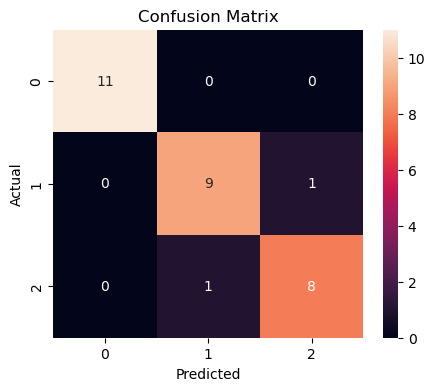

In [35]:
# visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ***11- Visualizie the Decision Tree Classifier Model*** ###

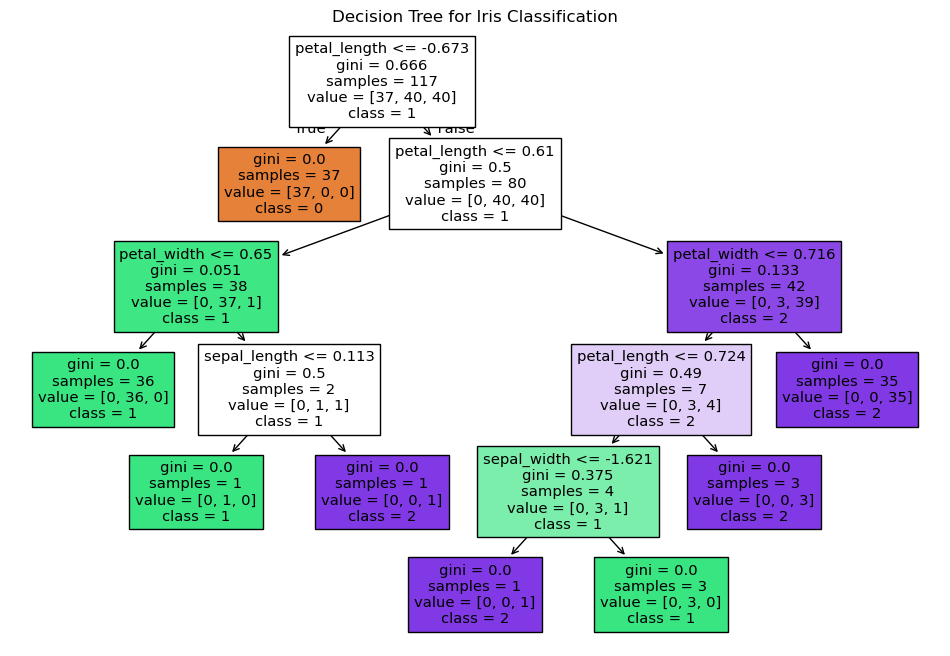

In [36]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=[str(cls) for cls in df.species.unique()], filled=True)
plt.title("Decision Tree for Iris Classification")
plt.show()

## ***`Conclusion`*** ##

**In this notebook, we successfully implemented a Decision Tree Classifier to predict the species of flowers using the Iris dataset. The main steps included:**

---

```
1.   Loaded and explored the Iris dataset, checking for missing values and duplicates to ensure data quality.

2.   Preprocessed the data by encoding the categorical target variable (species) and 
     selecting relevant features (sepal length, sepal width, petal length,  petal width).

3.   Split the data into training and testing sets to evaluate model performance on unseen data.

4.   Trained a decision tree classifier using scikit-learn on the preprocessed Iris dataset.

5.   Visualized the decision tree structure to interpret the model's decision-making process and understand feature importance.

6.   Pruned the decision tree to prevent overfitting, optimizing its generalization to new data.

7.   Evaluated the model using classification metrics such as accuracy, precision, recall, and F1-score to assess its performance.

8.   Plotted the decision tree to provide clear insights into feature importance and class separation logic.
```

---

**These steps ensured the data was properly prepared and the decision tree model was thoroughly evaluated, providing valuable insights into the classification of Iris species.**